In [6]:
import paths
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import itertools

In [7]:
data_path = (paths.results / "old_results") / "cust_kmeans_dist-correlation_ttype-percentage_tvalue-15_k-4_ninits-50_activation-pos_n-481"
df_path = data_path / "frames_clustering.pkl"

In [8]:
frame_clustering = pd.read_pickle(df_path).reset_index(level='frame_time')
frame_clustering

frame_time  type  cluster
subj_name       ses_name                             
sub-CC00068XX11 ses-20701            7  high        2
                ses-20701            8  high        2
                ses-20701            9  high        2
                ses-20701           10  high        2
                ses-20701           11  high        1
...                                ...   ...      ...
sub-CC01232BN12 ses-152130        2269  high        1
                ses-152130        2270  high        1
                ses-152130        2273  high        2
                ses-152130        2281  high        1
                ses-152130        2282  high        1

[164983 rows x 3 columns]

In [9]:
subjs_infos = paths.bids_root / "combined.tsv"
subjs_infos = pd.read_csv(subjs_infos, sep="\t")
subjs_infos['subj_name'] = subjs_infos['participant_id'].apply(lambda x: f"sub-{x}")
subjs_infos['ses_name'] = subjs_infos['session_id'].apply(lambda x: f"ses-{x}")
subjs_infos = subjs_infos.set_index(["subj_name", "ses_name"]).drop(columns=['participant_id', 'session_id'])
subjs_infos

,,scan_number,singleton,sedation,birth_age,scan_age,sex,birth_weight,head_circumference_scan,qc_dmri_eddy_nvols,qc_dmri_shard_nvols,...,qc_fmri_fieldmap_type,qc_fmri_dvars_z,qc_fmri_tsnr_z,qc_fmri_mcdc2sbref_z,qc_fmri_sbref2struct_z,qc_fmri_fmap2struct_z,qc_fmri_standard2struct_z,qc_fmri_flagged,qc_fmri_comment,qc_smri_pipeline_status
subj_name,ses_name,,,,,,,,,,,,,,,,,,,,,
sub-CC00050XX01,ses-7201,1,S,False,43.000000,43.29,female,3.910,37.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
sub-CC00051XX02,ses-7702,1,S,False,39.857143,40.00,female,3.310,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
sub-CC00052XX03,ses-8300,1,S,False,38.000000,38.71,female,2.640,33.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
sub-CC00053XX04,ses-8607,1,S,False,40.000000,40.43,female,3.460,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
sub-CC00054XX05,ses-8800,1,S,False,41.857143,42.14,male,3.690,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-CC01232BN12,ses-152130,1,M,False,35.000000,35.43,female,2.140,30.1,300.0,300.0,...,spin_echo_epi,1.149254,0.655733,1.852760,1.716708,0.556462,0.778163,False,NaN,full
sub-CC01234AN14,ses-155030,1,M,False,32.857143,33.29,female,2.280,30.5,300.0,300.0,...,dual_echo_time,-0.446718,-0.591990,1.563579,1.603737,2.113433,4.689710,False,corrupted spinecho,full
sub-CC01234BN14,ses-155230,1,M,False,32.857143,33.43,female,2.150,31.0,300.0,300.0,...,spin_echo_epi,0.223027,-0.246356,2.395129,1.663545,2.136479,4.685564,False,NaN,full


In [10]:
combined_df = frame_clustering.join(subjs_infos, how='left')
combined_df

frame_time  type  cluster  scan_number singleton  \
subj_name       ses_name                                                       
sub-CC00068XX11 ses-20701            7  high        2            1         S   
                ses-20701            8  high        2            1         S   
                ses-20701            9  high        2            1         S   
                ses-20701           10  high        2            1         S   
                ses-20701           11  high        1            1         S   
...                                ...   ...      ...          ...       ...   
sub-CC01232BN12 ses-152130        2269  high        1            1         M   
                ses-152130        2270  high        1            1         M   
                ses-152130        2273  high        2            1         M   
                ses-152130        2281  high        1            1         M   
                ses-152130        2282  high        1            1         M   

                            sedation  birth_age  scan_age     sex  \
subj_name       ses_name                                            
sub-CC00068XX11 ses-20701      False  40.428571     40.71  female   
                ses-20701      False  40.428571     40.71  female   
                ses-20701      False  40.428571     40.71  female   
                ses-20701      False  40.428571     40.71  female   
                ses-20701      False  40.428571     40.71  female   
...                              ...        ...       ...     ...   
sub-CC01232BN12 ses-152130     False  35.000000     35.43  female   
                ses-152130     False  35.000000     35.43  female   
                ses-152130     False  35.000000     35.43  female   
                ses-152130     False  35.000000     35.43  female   
                ses-152130     False  35.000000     35.43  female   

                            birth_weight  ...  qc_fmri_fieldmap_type  \
subj_name       ses_name                  ...                          
sub-CC00068XX11 ses-20701           3.58  ...          spin_echo_epi   
                ses-20701           3.58  ...          spin_echo_epi   
                ses-20701           3.58  ...          spin_echo_epi   
                ses-20701           3.58  ...          spin_echo_epi   
                ses-20701           3.58  ...          spin_echo_epi   
...                                  ...  ...                    ...   
sub-CC01232BN12 ses-152130          2.14  ...          spin_echo_epi   
                ses-152130          2.14  ...          spin_echo_epi   
                ses-152130          2.14  ...          spin_echo_epi   
                ses-152130          2.14  ...          spin_echo_epi   
                ses-152130          2.14  ...          spin_echo_epi   

                            qc_fmri_dvars_z  qc_fmri_tsnr_z  \
subj_name       ses_name                                      
sub-CC00068XX11 ses-20701          0.216294       -0.319705   
                ses-20701          0.216294       -0.319705   
                ses-20701          0.216294       -0.319705   
                ses-20701          0.216294       -0.319705   
                ses-20701          0.216294       -0.319705   
...                                     ...             ...   
sub-CC01232BN12 ses-152130         1.149254        0.655733   
                ses-152130         1.149254        0.655733   
                ses-152130         1.149254        0.655733   
                ses-152130         1.149254        0.655733   
                ses-152130         1.149254        0.655733   

                            qc_fmri_mcdc2sbref_z  qc_fmri_sbref2struct_z  \
subj_name       ses_name                                                   
sub-CC00068XX11 ses-20701               0.121056               -0.194929   
                ses-20701               0.121056               -0.194929   
                ses-20701   

In [11]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

cluster_props_per_subject = combined_df.groupby(
    ['subj_name', 'ses_name', 'scan_age', 'cluster']
).size().unstack()
cluster_props_per_subject = cluster_props_per_subject.sort_values('scan_age')
cluster_props_per_subject

,,cluster,0,1,2,3
subj_name,ses_name,scan_age,,,,
sub-CC00525XX14,ses-150600,33.57,154,41,103,45
sub-CC01018XX12,ses-46130,33.57,120,116,86,21
sub-CC00855XX14,ses-30210,33.57,88,92,85,78
sub-CC01153AN07,ses-102030,33.71,112,53,109,69
sub-CC00293AN14,ses-97401,34.00,99,92,79,73
...,...,...,...,...,...,...
sub-CC01236XX16,ses-155830,44.43,97,114,47,85
sub-CC00316XX11,ses-101300,44.43,149,62,74,58
sub-CC00874XX17,ses-18630,44.71,129,86,66,62


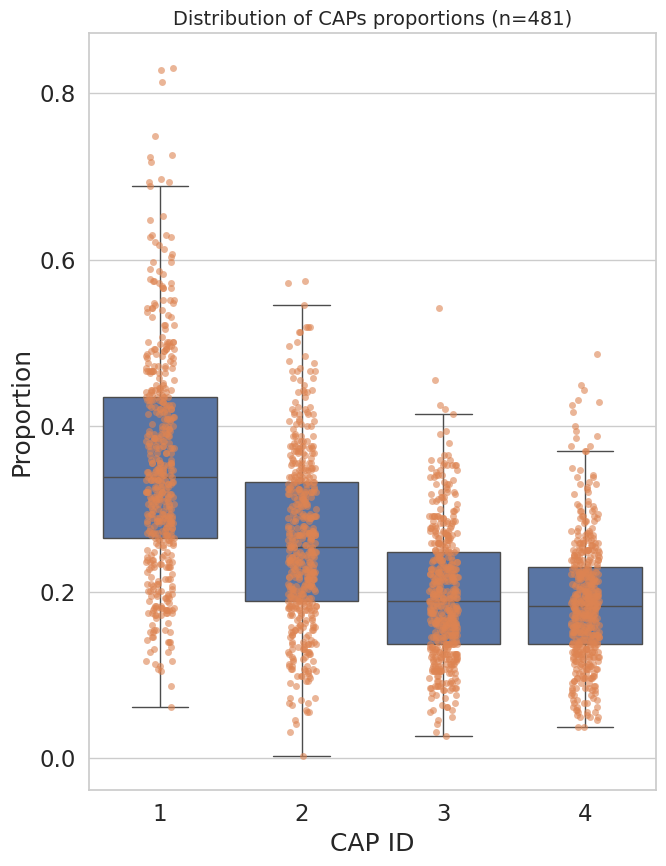

In [12]:
import seaborn as sns
cluster_props = cluster_props_per_subject.div(cluster_props_per_subject.sum(axis=1), axis=0)
df_melted = cluster_props.reset_index().melt(id_vars=['subj_name', 'ses_name', 'scan_age'],
                                             var_name='cluster', value_name='proportion')
df_melted["cluster"] = df_melted["cluster"] + 1



sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(7, 9))
sns.boxplot(
    x='cluster',
    y='proportion',
    data=df_melted,
    showfliers=False,
)

# Color points by age group
sns.stripplot(
    x='cluster',
    y='proportion',
    data=df_melted,
    # hue='age_group',
    # palette='Set2',
    alpha=0.6,
    jitter=0.10,
    dodge=False
)

plt.title(f"Distribution of CAPs proportions (n={len(cluster_props_per_subject)})", fontsize=14)
plt.ylabel("Proportion")
plt.xlabel("CAP ID")
plt.tight_layout()
plt.show()


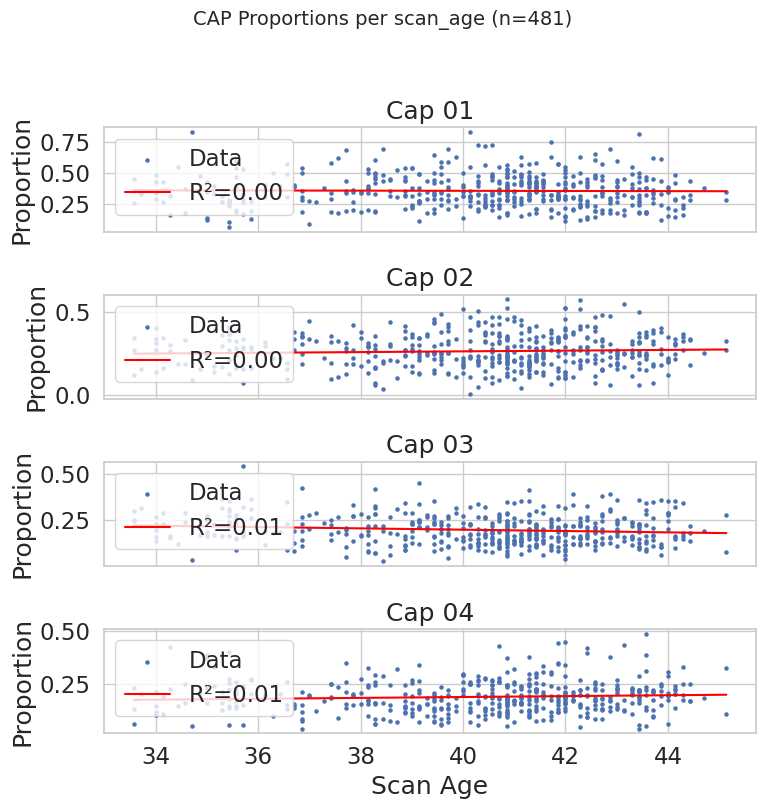

In [13]:

n_individual_cap_per_subject = cluster_props_per_subject.sum(axis=1)

scan_age = cluster_props_per_subject.index.get_level_values('scan_age')
n_caps = cluster_props_per_subject.shape[1]
n = cluster_props_per_subject.shape[0]
fig, axes = plt.subplots(n_caps, 1, figsize=(8, 2 * n_caps), sharex=True)

for cap_id, ax in enumerate(axes):
    cap_proportion = cluster_props_per_subject.iloc[:, cap_id].values/n_individual_cap_per_subject.values
    ax.scatter(scan_age, cap_proportion, label='Data', s=5)

    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(scan_age, cap_proportion)
    line = slope * scan_age + intercept
    ax.plot(scan_age, line, color='red', label=f'R²={r_value**2:.2f}')

    ax.set_title(f"Cap {cap_id+1:02d}")
    ax.set_ylabel("Proportion")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Scan Age")
fig.suptitle(f"CAP Proportions per scan_age ({n=})", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [14]:
cap_type_sizes = frame_clustering.groupby(['cluster', 'type']).size()
print(cap_type_sizes.sum())
for cap_id, cap_types in cap_type_sizes.unstack().iterrows():
    for cap_type in cap_types.index:
        count = cap_types[cap_type]
        print(f"{cap_type} activation frames : {count} ({count / cap_types.sum() * 100:.0f}%)")

164983
high activation frames : 58406 (100%)
high activation frames : 43096 (100%)
high activation frames : 32514 (100%)
high activation frames : 30967 (100%)


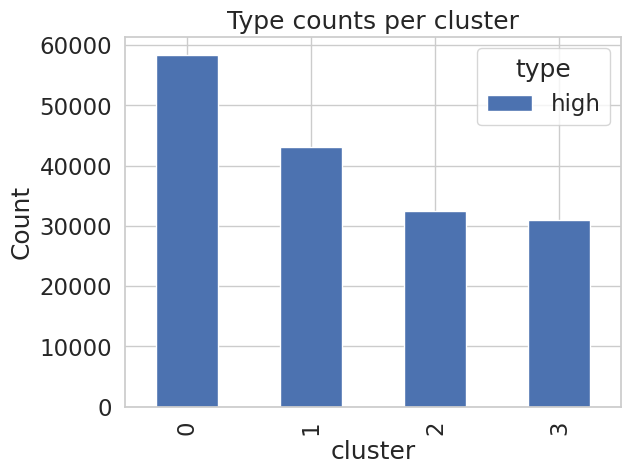

In [15]:
frame_clustering.groupby(['cluster', 'type']).size().unstack().plot(kind='bar')
plt.ylabel('Count')
plt.title('Type counts per cluster')
plt.show()